<a href="https://colab.research.google.com/github/Saeif-Saleh/Banking-System/blob/master/classify_different_usrp_overair_850MHz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow

Mon Mar 23 20:58:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/collected_multiple.mat')

In [33]:
print(list(matlab_data.keys())[3:])

['U3_test', 'U3_train', 'U4_test', 'U4_train', 'U5_test', 'U5_train']


In [0]:
usrp3_train=matlab_data['U3_train']
usrp4_train=matlab_data['U4_train']
usrp5_train=matlab_data['U5_train']

In [35]:
print(usrp3_train.shape)
print(usrp4_train.shape)
print(usrp5_train.shape)

(26899456, 2)
(27336192, 2)
(27599872, 2)


In [0]:
# usrp3_train=usrp3_train.reshape(-1,2)
# usrp4_train=usrp4_train.reshape(-1,2)
# usrp5_train=usrp5_train.reshape(-1,2)
# print(usrp3_train.shape)
# print(usrp4_train.shape)
# print(usrp5_train.shape)

In [0]:
usrp3_test=matlab_data['U3_test']
usrp4_test=matlab_data['U4_test']
usrp5_test=matlab_data['U5_test']

In [38]:
print(usrp5_test.shape)
print(usrp4_test.shape)
print(usrp3_test.shape)

(7875584, 2)
(6952448, 2)
(7226880, 2)


In [0]:
usrp3_train=usrp3_train[1000000:17777216]
usrp4_train=usrp4_train[1000000:17777216]
usrp5_train=usrp5_train[1000000:17777216]

In [0]:
usrp3_test=usrp3_test[1000000:5194304]
usrp4_test=usrp4_test[1000000:5194304]
usrp5_test=usrp5_test[1000000:5194304]

In [0]:
dim=128

In [42]:
train_x=np.concatenate((usrp3_train,usrp4_train,usrp5_train),axis=0)
test_x=np.concatenate((usrp3_test,usrp4_test,usrp5_test),axis=0)
print(train_x.shape)
print(test_x.shape)


(50331648, 2)
(12582912, 2)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [46]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
print(seprator)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:]=2
# Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:]=2


131072


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [48]:
print(train_x.shape)
print(train_y.shape)

(393216, 2, 128)
(393216, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
valid_x = valid_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [51]:
print(len(train_x))
print(len(valid_x))

314572
78644


In [52]:
train_x.shape

(314572, 128, 2, 1)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [60]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10)

Train on 314572 samples, validate on 78644 samples
Epoch 1/10
314572/314572 [==============================] - 90s 287us/sample - loss: 0.7725 - acc: 0.6372 - val_loss: 0.8533 - val_acc: 0.7288
Epoch 2/10
314572/314572 [==============================] - 93s 294us/sample - loss: 0.2815 - acc: 0.8988 - val_loss: 3.4714 - val_acc: 0.6122
Epoch 3/10
314572/314572 [==============================] - 93s 297us/sample - loss: 0.1588 - acc: 0.9561 - val_loss: 0.6520 - val_acc: 0.9278
Epoch 4/10
314572/314572 [==============================] - 93s 297us/sample - loss: 0.1058 - acc: 0.9681 - val_loss: 0.4055 - val_acc: 0.9507
Epoch 5/10
314572/314572 [==============================] - 93s 295us/sample - loss: 0.0944 - acc: 0.9729 - val_loss: 0.1843 - val_acc: 0.9939
Epoch 6/10
314572/314572 [==============================] - 92s 292us/sample - loss: 0.0894 - acc: 0.9724 - val_loss: 0.1534 - val_acc: 0.9972
Epoch 7/10
314572/314572 [==============================] - 90s 286us/sample - loss: 0.0711

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


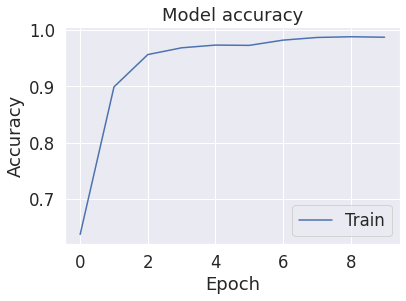

<Figure size 1440x720 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='bottom right')
plt.figure(figsize=(20,10))
plt.show()

In [0]:
from sklearn.utils import shuffle
test_x,test_y=shuffle(test_x,test_y)

In [66]:
conv_model.evaluate(test_x,test_y)

98304/98304 [==============================] - 9s 89us/sample - loss: 0.2058 - acc: 0.9608


[0.20581923071714905, 0.9608256]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

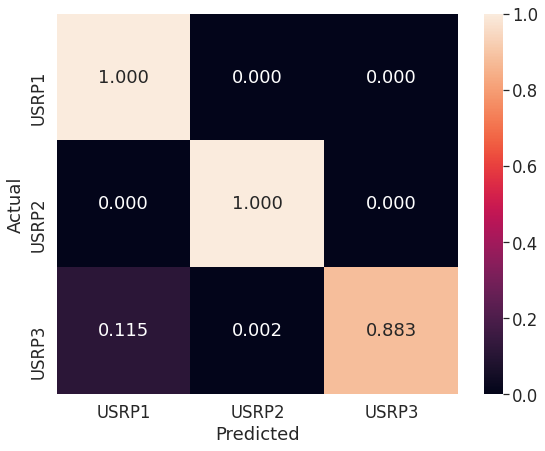

In [78]:
target_names='USRP1','USRP2','USRP3'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [79]:
from sklearn.metrics import classification_report

print('\033[1m'+classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

       USRP1       0.90      1.00      0.95     32768
       USRP2       1.00      1.00      1.00     32768
       USRP3       1.00      0.88      0.94     32768

    accuracy                           0.96     98304
   macro avg       0.96      0.96      0.96     98304
weighted avg       0.96      0.96      0.96     98304

